In [3]:
import pandas as pd
df = pd.read_excel('sb_cancellations.xlsx', sheet_name='Trip Data')
# percentage of cancelled rides 
(df['current_state'].value_counts()['passengercancelled']/len(df))*100

24.10726818878127

In [4]:

# only keep data of cancelled trips dataframe(dropna)
df = df.dropna(subset=['passenger_cancelled'])
df = df.dropna(subset=['ping_requested'])


In [5]:
# Count the occurrences of each value in the 'name' column
passenger_counts = df['passenger_id'].value_counts()

# Create a list of ids that appear more than once
id_to_keep = passenger_counts[passenger_counts > 1].index.tolist()

# Only keep the rows in the DataFrame where the 'passenger_id' column is in the list of names to keep
df_reoccurrence = df[df['passenger_id'].isin(id_to_keep)]
df_reoccurrence = df.sort_values('passenger_id')
df_reoccurrence = df.sort_values('ping_requested')
df_reoccurrence.head(2)

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance
86716,66756596,2020-01-11 00:00:17,1159401,892176.0,MUTUNGO,Nakawa,2020-01-11 00:00:17,NaT,2020-01-11 00:05:25,NaT,NaT,NaT,passengercancelled,NaN
156155,66756608,2020-01-11 00:00:43,1046245,752541.0,BWAISE II,Kawempe,2020-01-11 00:00:43,NaT,2020-01-11 00:01:07,NaT,NaT,NaT,passengercancelled,10.0


In [6]:

# Convert the 'time' column to datetime format
df_reoccurrence['ping_requested'] = pd.to_datetime(df_reoccurrence['ping_requested'])

# Group the rows by passenger id and apply a function to calculate the time differences
def time_diff(group):
    return group['ping_requested'].diff()

diffs = df_reoccurrence.groupby('passenger_id').apply(time_diff)

# Concatenate the resulting Series objects into a new DataFrame
df_diffs = pd.concat([diffs], axis=1)

# Rename the columns
df_diffs.columns = ['time_diff']

# Drop the rows with missing values (i.e., the first row of each group)
df_diffs = df_diffs.dropna()

# Print the resulting DataFrame
print(df_diffs)

                          time_diff
passenger_id                       
194          55615  0 days 15:58:45
             40425  0 days 00:03:35
218          130037 1 days 04:46:32
303          111563 2 days 17:26:23
356          147161 0 days 23:38:21
...                             ...
1239933      50732  0 days 00:03:04
1240268      158376 0 days 01:48:54
1240523      99179  0 days 00:08:10
             22838  0 days 00:40:14
1241226      73832  0 days 00:01:16

[10280 rows x 1 columns]


In [7]:
df_diffs.head()

time_diff
passenger_id                       
194          55615  0 days 15:58:45
             40425  0 days 00:03:35
218          130037 1 days 04:46:32
303          111563 2 days 17:26:23
356          147161 0 days 23:38:21

In [8]:
df_under_5 = df_diffs[df_diffs['time_diff'] < pd.Timedelta(minutes=5)]


In [9]:
df_under_5.head()

,,time_diff
passenger_id,,
194,40425,0 days 00:03:35
356,59985,0 days 00:00:27
589,20655,0 days 00:02:13
877,87782,0 days 00:01:30
1132,25339,0 days 00:01:02


In [10]:
df_under_5.info()

print("Therefore 3563 cancellations occur and are reodered by the same passenger_id")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2236 entries, (194, 40425) to (1241226, 73832)
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   time_diff  2236 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 2.6 MB
Therefore 3563 cancellations occur and are reodered by the same passenger_id


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38494 entries, 2 to 163848
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   trip_id                        38494 non-null  int64         
 1   trip_date                      38494 non-null  datetime64[ns]
 2   passenger_id                   38494 non-null  int64         
 3   driver_id                      38490 non-null  float64       
 4   parish                         38156 non-null  object        
 5   subcounty                      38155 non-null  object        
 6   ping_requested                 38494 non-null  datetime64[ns]
 7   pair_requested                 0 non-null      datetime64[ns]
 8   passenger_cancelled            38494 non-null  datetime64[ns]
 9   driver_arrived                 1489 non-null   datetime64[ns]
 10  started_trip                   1 non-null      datetime64[ns]
 11  ended_trip         

In [12]:
df_reoccurrence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38494 entries, 86716 to 140526
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   trip_id                        38494 non-null  int64         
 1   trip_date                      38494 non-null  datetime64[ns]
 2   passenger_id                   38494 non-null  int64         
 3   driver_id                      38490 non-null  float64       
 4   parish                         38156 non-null  object        
 5   subcounty                      38155 non-null  object        
 6   ping_requested                 38494 non-null  datetime64[ns]
 7   pair_requested                 0 non-null      datetime64[ns]
 8   passenger_cancelled            38494 non-null  datetime64[ns]
 9   driver_arrived                 1489 non-null   datetime64[ns]
 10  started_trip                   1 non-null      datetime64[ns]
 11  ended_trip     

In [13]:
df_under_5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2236 entries, (194, 40425) to (1241226, 73832)
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   time_diff  2236 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 2.6 MB


**Cancelled and not reordered are ;**

In [14]:
Cancelled_without_reorder = (df['passenger_cancelled'].count()-df_under_5['time_diff'].count())/ df['passenger_cancelled'].count()
Cancelled_without_reorder*100

94.19130254065568

In [15]:
df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance
2,66795456,2020-01-11 13:28:04,1093472,32524.0,KIBULI,Makindye,2020-01-11 13:28:04,NaT,2020-01-11 13:28:42,2020-01-11 13:28:40,NaT,NaT,passengercancelled,127.0
5,66811388,2020-01-11 15:42:22,98198,145429.0,KIKAYA,Kawempe,2020-01-11 15:42:22,NaT,2020-01-11 15:44:56,NaT,NaT,NaT,passengercancelled,334.0
11,66791632,2020-01-11 12:54:47,536535,419130.0,KYANJA,Nakawa,2020-01-11 12:54:47,NaT,2020-01-11 12:56:06,NaT,NaT,NaT,passengercancelled,NaN
15,66779760,2020-01-11 11:01:43,328316,1108866.0,CIVIC CENTRE,Central,2020-01-11 11:01:43,NaT,2020-01-11 11:02:04,NaT,NaT,NaT,passengercancelled,56.0
16,66819404,2020-01-11 16:57:35,617949,798675.0,BUSEGA,Rubaga,2020-01-11 16:57:35,NaT,2020-01-11 17:00:08,NaT,NaT,NaT,passengercancelled,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38494 entries, 2 to 163848
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   trip_id                        38494 non-null  int64         
 1   trip_date                      38494 non-null  datetime64[ns]
 2   passenger_id                   38494 non-null  int64         
 3   driver_id                      38490 non-null  float64       
 4   parish                         38156 non-null  object        
 5   subcounty                      38155 non-null  object        
 6   ping_requested                 38494 non-null  datetime64[ns]
 7   pair_requested                 0 non-null      datetime64[ns]
 8   passenger_cancelled            38494 non-null  datetime64[ns]
 9   driver_arrived                 1489 non-null   datetime64[ns]
 10  started_trip                   1 non-null      datetime64[ns]
 11  ended_trip         

**How long passengers wait before cancelling an order**

In [17]:
df['ping_requested'] = pd.to_datetime(df['ping_requested'])  # convert to datetime object
df['passenger_cancelled'] = pd.to_datetime(df['passenger_cancelled'])  # convert to datetime object

df['Waiting_time'] = df['passenger_cancelled'] - df['ping_requested']  # calculate duration

In [18]:
df.head(5)

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time
2,66795456,2020-01-11 13:28:04,1093472,32524.0,KIBULI,Makindye,2020-01-11 13:28:04,NaT,2020-01-11 13:28:42,2020-01-11 13:28:40,NaT,NaT,passengercancelled,127.0,0 days 00:00:38
5,66811388,2020-01-11 15:42:22,98198,145429.0,KIKAYA,Kawempe,2020-01-11 15:42:22,NaT,2020-01-11 15:44:56,NaT,NaT,NaT,passengercancelled,334.0,0 days 00:02:34
11,66791632,2020-01-11 12:54:47,536535,419130.0,KYANJA,Nakawa,2020-01-11 12:54:47,NaT,2020-01-11 12:56:06,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:01:19
15,66779760,2020-01-11 11:01:43,328316,1108866.0,CIVIC CENTRE,Central,2020-01-11 11:01:43,NaT,2020-01-11 11:02:04,NaT,NaT,NaT,passengercancelled,56.0,0 days 00:00:21
16,66819404,2020-01-11 16:57:35,617949,798675.0,BUSEGA,Rubaga,2020-01-11 16:57:35,NaT,2020-01-11 17:00:08,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:02:33


In [19]:
df.sort_values(by='Waiting_time', ascending=False, inplace=True)

In [20]:
df.head(3)

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time
81428,67067824,2020-01-13 22:46:26,719860,553340.0,KYALIWAJALA,Kira,2020-01-13 22:46:26,NaT,2020-03-20 22:47:26,NaT,NaT,NaT,passengercancelled,NaN,67 days 00:01:00
84694,67051628,2020-01-13 20:18:22,19867,109797.0,CIVIC CENTRE,Central,2020-01-13 20:18:22,NaT,2020-02-20 15:18:42,NaT,NaT,NaT,passengercancelled,NaN,37 days 19:00:20
71294,67033928,2020-01-13 18:40:36,1227182,863581.0,WANDEGEYA,Kawempe,2020-01-13 18:40:36,NaT,2020-02-20 10:43:59,NaT,NaT,NaT,passengercancelled,NaN,37 days 16:03:23


Assume the normal time for ride cancellation be 40 minutes for a really in-need passenger, getting rid of outliers! 

In [21]:
pct99 = df['Waiting_time'].quantile(0.99) # Calculate the 99th percentile
df_truncated = df[df['Waiting_time'] <= pct99] # Filter the DataFrame to include only values below the 96th percentile

In [22]:
df_truncated["Waiting_time"].describe()

count                        38110
mean     0 days 00:02:49.865415901
std      0 days 00:03:09.219396808
min                0 days 00:00:01
25%                0 days 00:00:44
50%                0 days 00:01:49
75%                0 days 00:03:35
max                0 days 00:22:08
Name: Waiting_time, dtype: object

**Distance between rider and passenger**

In [23]:
df_truncated["driver_distance_at_acceptance"].describe()

count    20925.000000
mean       365.242103
std        368.805196
min          0.000000
25%         86.000000
50%        234.000000
75%        533.000000
max       1967.000000
Name: driver_distance_at_acceptance, dtype: float64

25% of riders are always 500m away from the passenger. Could this have an impact?? Maybe we aren't having as many riders.

**Subcounties appearing most with riders furthest away from clients**

In [24]:
df_far_riders = df_truncated[df_truncated["driver_distance_at_acceptance"] > 540]

In [25]:
# percentage of these riders 
percentage = (df_far_riders["subcounty"].value_counts()/df_truncated["subcounty"].value_counts())*100

In [26]:
s_sorted = percentage.sort_values(ascending=False)

# Print the sorted series
print(s_sorted)

subcounty
Katabi          66.666667
gombe wakiso    50.000000
Nsangi          50.000000
Kyengera        39.393939
Wakiso          39.080460
Nangabo         32.558140
Kira            32.190179
Ssisa           23.214286
Nangabo         23.000000
Kasangati       22.000000
Nansana         21.167883
Makindye        20.350404
Busiro          16.666667
Rubaga          16.293706
Nakawa          15.930774
Kawempe         12.168906
Central          4.446743
Name: count, dtype: float64


As noted, places like Katabi, Gombe, Wakiso, Nsangi and Kyengera have few riders in place and most are in the upper quartile of furthest distances from passangers 

In [27]:
df_truncated.head(2)

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time
151441,67037828,2020-01-13 19:02:44,1144115,1109067.0,NAGURU I,Nakawa,2020-01-13 19:02:44,NaT,2020-01-13 19:24:52,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:22:08
38244,67407228,2020-01-16 10:46:20,13265,135791.0,NAKASERO III,Central,2020-01-16 10:46:20,NaT,2020-01-16 11:08:28,NaT,NaT,NaT,passengercancelled,63.0,0 days 00:22:08


In [28]:
# extract day of week as a new column
df_truncated['day_of_week'] = df_truncated['trip_date'].dt.day_name()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6544\2512245522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated['day_of_week'] = df_truncated['trip_date'].dt.day_name()


In [29]:
df_truncated.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time,day_of_week
151441,67037828,2020-01-13 19:02:44,1144115,1109067.0,NAGURU I,Nakawa,2020-01-13 19:02:44,NaT,2020-01-13 19:24:52,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:22:08,Monday
38244,67407228,2020-01-16 10:46:20,13265,135791.0,NAKASERO III,Central,2020-01-16 10:46:20,NaT,2020-01-16 11:08:28,NaT,NaT,NaT,passengercancelled,63.0,0 days 00:22:08,Thursday
22382,67472212,2020-01-16 18:31:55,480853,1208592.0,INDUSTRIAL AREA,Central,2020-01-16 18:31:55,NaT,2020-01-16 18:54:02,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:22:07,Thursday
101294,67464988,2020-01-16 17:49:28,642115,419133.0,MASAJJA,Makindye,2020-01-16 17:49:28,NaT,2020-01-16 18:11:29,NaT,NaT,NaT,passengercancelled,375.0,0 days 00:22:01,Thursday
29857,67433564,2020-01-16 14:16:28,1003708,218453.0,BUKOTO II,Nakawa,2020-01-16 14:16:28,NaT,2020-01-16 14:38:26,NaT,NaT,NaT,passengercancelled,572.0,0 days 00:21:58,Thursday


In [30]:
df_truncated["day_of_week"].value_counts()

day_of_week
Friday       6615
Wednesday    6208
Monday       6106
Thursday     5870
Tuesday      5869
Saturday     4363
Sunday       3079
Name: count, dtype: int64

In [31]:
# extract hour to a new column
df_truncated['hour'] = df_truncated['trip_date'].dt.hour

C:\Users\DELL\AppData\Local\Temp\ipykernel_6544\961402238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_truncated['hour'] = df_truncated['trip_date'].dt.hour


In [32]:
df_truncated["hour"].value_counts()

hour
17    3185
19    2913
18    2751
15    2624
16    2562
20    2557
14    2475
21    2267
13    2258
12    2022
9     1978
10    1870
11    1832
8     1794
22    1657
7     1288
23    1051
0      319
6      291
1      155
5      101
2       76
4       43
3       41
Name: count, dtype: int64

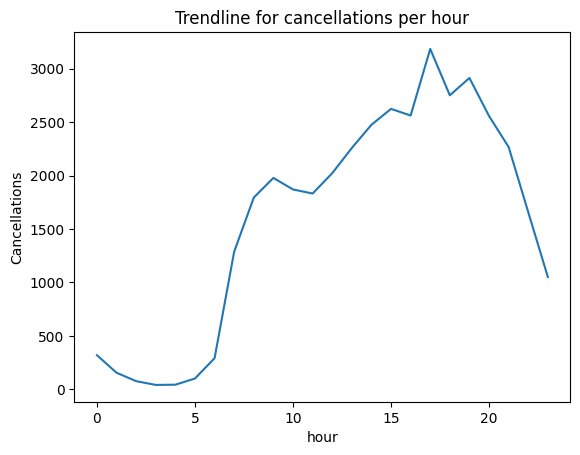

In [33]:
import matplotlib.pyplot as plt

# Assuming your data frame is called df and the column you want to plot is called 'column_name'
value_counts = df_truncated['hour'].value_counts().sort_index()
value_counts.plot(kind='line')

plt.xlabel('hour')
plt.ylabel('Cancellations')
plt.title('Trendline for cancellations per hour')
plt.show()

In [34]:
df_truncated.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time,day_of_week,hour
151441,67037828,2020-01-13 19:02:44,1144115,1109067.0,NAGURU I,Nakawa,2020-01-13 19:02:44,NaT,2020-01-13 19:24:52,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:22:08,Monday,19
38244,67407228,2020-01-16 10:46:20,13265,135791.0,NAKASERO III,Central,2020-01-16 10:46:20,NaT,2020-01-16 11:08:28,NaT,NaT,NaT,passengercancelled,63.0,0 days 00:22:08,Thursday,10
22382,67472212,2020-01-16 18:31:55,480853,1208592.0,INDUSTRIAL AREA,Central,2020-01-16 18:31:55,NaT,2020-01-16 18:54:02,NaT,NaT,NaT,passengercancelled,NaN,0 days 00:22:07,Thursday,18
101294,67464988,2020-01-16 17:49:28,642115,419133.0,MASAJJA,Makindye,2020-01-16 17:49:28,NaT,2020-01-16 18:11:29,NaT,NaT,NaT,passengercancelled,375.0,0 days 00:22:01,Thursday,17
29857,67433564,2020-01-16 14:16:28,1003708,218453.0,BUKOTO II,Nakawa,2020-01-16 14:16:28,NaT,2020-01-16 14:38:26,NaT,NaT,NaT,passengercancelled,572.0,0 days 00:21:58,Thursday,14


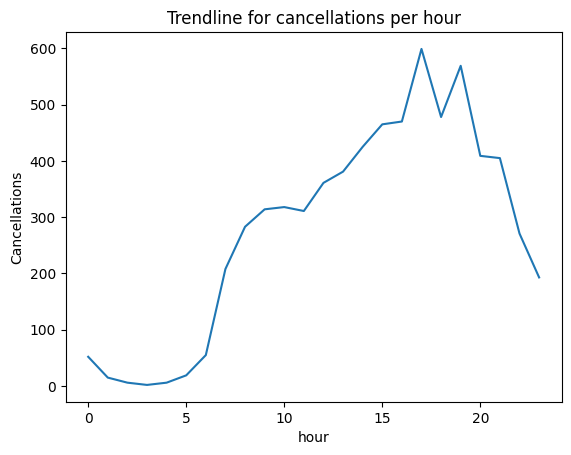

In [35]:
friday_df = df_truncated[df_truncated['day_of_week'] == 'Friday']
import matplotlib.pyplot as plt

# Assuming your data frame is called df and the column you want to plot is called 'column_name'
value_counts = friday_df['hour'].value_counts().sort_index()
value_counts.plot(kind='line')

plt.xlabel('hour')
plt.ylabel('Cancellations')
plt.title('Trendline for cancellations per hour')
plt.show()

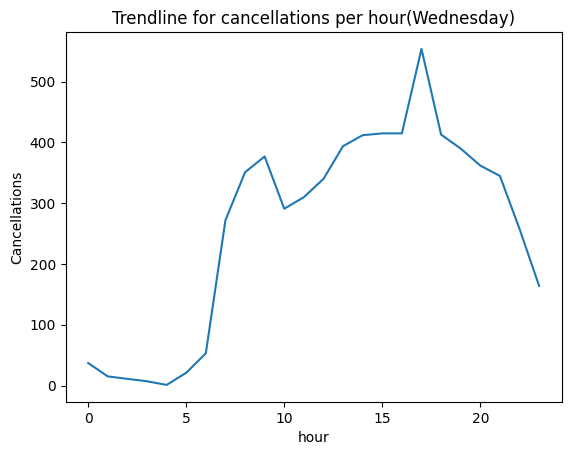

In [36]:
wednesday_df = df_truncated[df_truncated['day_of_week'] == 'Wednesday']
import matplotlib.pyplot as plt

# Assuming your data frame is called df and the column you want to plot is called 'column_name'
value_counts = wednesday_df['hour'].value_counts().sort_index()
value_counts.plot(kind='line')

plt.xlabel('hour')
plt.ylabel('Cancellations')
plt.title('Trendline for cancellations per hour(Wednesday)')
plt.show()

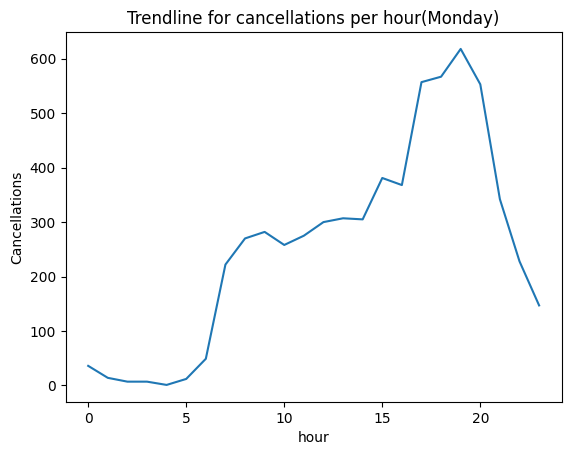

In [37]:
monday_df = df_truncated[df_truncated['day_of_week'] == 'Monday']
import matplotlib.pyplot as plt

# Assuming your data frame is called df and the column you want to plot is called 'column_name'
value_counts = monday_df['hour'].value_counts().sort_index()
value_counts.plot(kind='line')

plt.xlabel('hour')
plt.ylabel('Cancellations')
plt.title('Trendline for cancellations per hour(Monday)')
plt.show()

In [38]:
df_far_riders.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time
29857,67433564,2020-01-16 14:16:28,1003708,218453.0,BUKOTO II,Nakawa,2020-01-16 14:16:28,NaT,2020-01-16 14:38:26,NaT,NaT,NaT,passengercancelled,572.0,0 days 00:21:58
4234,67437932,2020-01-16 14:47:29,1001089,927867.0,KISIMBIRI,Kyengera,2020-01-16 14:47:29,NaT,2020-01-16 15:08:55,NaT,NaT,NaT,passengercancelled,1507.0,0 days 00:21:26
153558,66827772,2020-01-11 18:16:39,811775,431236.0,MUTUNGO,Nakawa,2020-01-11 18:16:39,NaT,2020-01-11 18:37:53,NaT,NaT,NaT,passengercancelled,1298.0,0 days 00:21:14
152912,67519272,2020-01-17 08:09:06,1214340,1028561.0,MAKINDYE I,Makindye,2020-01-17 08:09:05,NaT,2020-01-17 08:30:14,NaT,NaT,NaT,passengercancelled,799.0,0 days 00:21:09
56836,67072392,2020-01-14 01:52:54,369221,182322.0,RUBAGA,Rubaga,2020-01-14 01:52:54,NaT,2020-01-14 02:13:34,NaT,NaT,NaT,passengercancelled,1118.0,0 days 00:20:40


In [39]:
df_far_riders['day_of_week'] = df_far_riders['trip_date'].dt.day_name()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6544\4217609715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_far_riders['day_of_week'] = df_far_riders['trip_date'].dt.day_name()


In [40]:
df_far_riders.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,Waiting_time,day_of_week
29857,67433564,2020-01-16 14:16:28,1003708,218453.0,BUKOTO II,Nakawa,2020-01-16 14:16:28,NaT,2020-01-16 14:38:26,NaT,NaT,NaT,passengercancelled,572.0,0 days 00:21:58,Thursday
4234,67437932,2020-01-16 14:47:29,1001089,927867.0,KISIMBIRI,Kyengera,2020-01-16 14:47:29,NaT,2020-01-16 15:08:55,NaT,NaT,NaT,passengercancelled,1507.0,0 days 00:21:26,Thursday
153558,66827772,2020-01-11 18:16:39,811775,431236.0,MUTUNGO,Nakawa,2020-01-11 18:16:39,NaT,2020-01-11 18:37:53,NaT,NaT,NaT,passengercancelled,1298.0,0 days 00:21:14,Saturday
152912,67519272,2020-01-17 08:09:06,1214340,1028561.0,MAKINDYE I,Makindye,2020-01-17 08:09:05,NaT,2020-01-17 08:30:14,NaT,NaT,NaT,passengercancelled,799.0,0 days 00:21:09,Friday
56836,67072392,2020-01-14 01:52:54,369221,182322.0,RUBAGA,Rubaga,2020-01-14 01:52:54,NaT,2020-01-14 02:13:34,NaT,NaT,NaT,passengercancelled,1118.0,0 days 00:20:40,Tuesday


In [41]:
df_far_riders["day_of_week"].value_counts()/df_truncated["day_of_week"].value_counts()*100

day_of_week
Friday       12.910053
Monday       13.249263
Saturday     12.193445
Sunday       19.454368
Thursday     11.959114
Tuesday      13.767252
Wednesday    13.321521
Name: count, dtype: float64

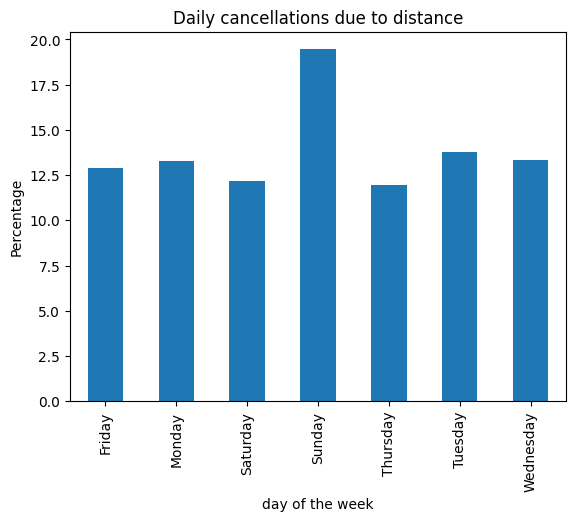

In [42]:
# Assuming your data frame is called df and the column you want to plot is called 'column_name'
value_counts = df_far_riders["day_of_week"].value_counts()/df_truncated["day_of_week"].value_counts()*100
value_counts.plot(kind='bar')

plt.xlabel('day of the week')
plt.ylabel('Percentage')
plt.title('Daily cancellations due to distance')
plt.show()